In [31]:
import numpy as np
TestPerf = np.load("GeoShapes_Curriculum_FullUniform_TestPerf_BALD_500Epochs.npy")
ValError = np.load("GeoShapes_Curriculum_FullUniform_ValAcc_BALD_500Epochs.npy")

In [32]:
this = np.sum(np.sum(TestPerf,axis=0),axis=0)
NumComplete = 0
while this[NumComplete] >0:
    NumComplete +=1
print(NumComplete)

15


In [33]:
TestPerf = TestPerf[:,:,0:NumComplete]
ValError = ValError[:,:,0:NumComplete]

In [34]:
TestPerf_Mean = TestPerf.mean(axis=2)
TestPerf_StE = TestPerf.std(axis=2) / np.sqrt(NumComplete)

In [35]:
TestPerf_Mean

array([[0.38046134, 0.85117334],
       [0.50665024, 0.80009333],
       [0.73976866, 0.71269333],
       [0.43683736, 0.82187999],
       [0.42834536, 0.83028001]])

In [36]:
TestPerf_Mean + TestPerf_StE

array([[0.38620201, 0.85358146],
       [0.51141587, 0.80124539],
       [0.74693843, 0.71576642],
       [0.44112973, 0.82394325],
       [0.43333948, 0.83227714]])

In [37]:
TestPerf_Mean - TestPerf_StE

array([[0.37472067, 0.84876522],
       [0.50188461, 0.79894127],
       [0.73259889, 0.70962024],
       [0.432545  , 0.81981674],
       [0.42335124, 0.82828287]])

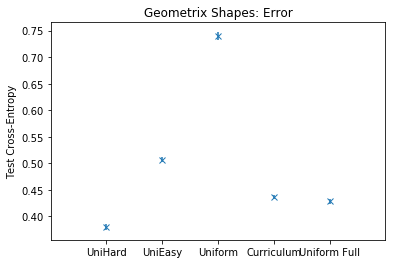

In [39]:
import matplotlib.pyplot as plt

flag = 0

labels = ['Hard','Easy','Uni','Curriculum']
plt.errorbar(np.array([1,2,3,4,5],dtype=int),TestPerf_Mean[:,flag],yerr = TestPerf_StE[:,flag],marker ='x',linestyle='none')
my_xticks = ['UniHard','UniEasy','Uniform','Curriculum','Uniform Full']
plt.xticks(np.array([1,2,3,4,5],dtype=int), my_xticks)
thisplot = plt.gca()
thisplot.set_xlim(0,6)
if flag == 0:
    thisplot.set_title('Geometrix Shapes: Error')
    thisplot.set_ylabel('Test Cross-Entropy')
else:
    thisplot.set_title('Geometrix Shapes: Accuracy')
    thisplot.set_ylabel('Test Accuracy')

plt.show()

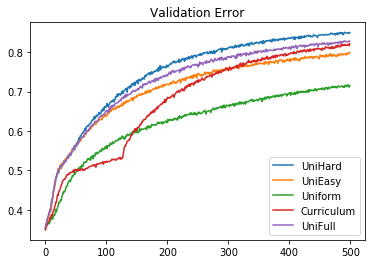

In [40]:
plt.plot(np.mean(ValError,axis=2))
plt.legend(['UniHard','UniEasy','Uniform','Curriculum','UniFull'],loc='best')
thisplot = plt.gca()
thisplot.set_title('Validation Error')
plt.show()

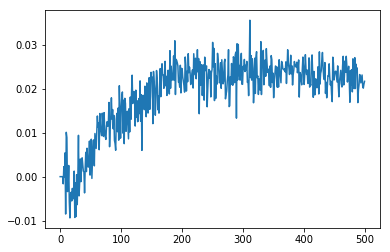

In [30]:
Diff = np.mean(ValError[:,0,:],axis=1) - np.mean(ValError[:,-1,:],axis=1)
plt.plot(Diff)
plt.show()

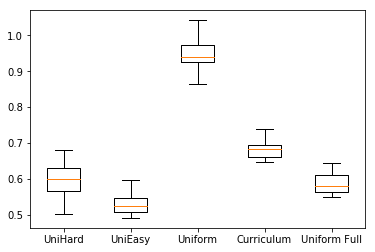

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data = TestPerf[:,0,:]
ax.boxplot(data.T)
my_xticks =['UniHard','UniEasy','Uniform','Curriculum','Uniform Full']
plt.xticks(np.array([1,2,3,4,5],dtype=int), my_xticks)
plt.show()